### **NLP Basics**

##### **NLP Basic Components:**
- **Lemmatization**: Reduces words to their base or dictionary form. Unlike stemming, lemmatization considers the context and transforms the word to its meaningful base form.
    - Running → Run
    - Easily → Easy
    - Wolves → Wolf
- **Stemming**: Stemming is the process of reducing words to their root or base form by removing suffixes, which simply removes or alters the endings of the words to get to what it assumes is the root form.
    - Running → Run
    - Easily → Easili
    - Wolves → Wolv
- **Stopwords**: Commonly used words in a language (like "the", "is", "in") which are often removed during preprocessing to reduce noise and focus on more meaningful words.
- **Token**: A basic unit of text, typically a word or punctuation mark, that has been parsed out from a larger body of text for analysis.
- **Tokenizer**: A tool for splitting text into tokens. It can be rule-based or learned from data. Different types of tokenizers (like wordpiece, unigram, byte pair encoding) are used depending on the language and the application.



1. *Whitespace Tokenizer*: Splits text based on whitespace 

In [6]:
text = "OpenAI develops artificial general intelligence (AGI)."
tokens = text.split()
print(tokens)

['OpenAI', 'develops', 'artificial', 'general', 'intelligence', '(AGI).']


2. *Word Tokenizerr*: Splits text into words

In [7]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

text = "OpenAI develops artificial general intelligence (AGI)."
tokens = word_tokenize(text)
print(tokens)

['OpenAI', 'develops', 'artificial', 'general', 'intelligence', '(', 'AGI', ')', '.']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alice\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


3. *Sentence Tokenizer*: Breaks text into sentences

In [8]:
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

text = "Hello World. Natural Language Processing is fun."
tokens = sent_tokenize(text)
print(tokens)

['Hello World.', 'Natural Language Processing is fun.']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alice\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


4. *Regex Tokenizer*: Uses regular expressions to capture tokens

In [9]:
from nltk.tokenize import RegexpTokenizer

text = "Email me at email@example.com or visit http://example.com."
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
tokens = tokenizer.tokenize(text)
print(tokens)

['Email', 'me', 'at', 'email', '@example.com', 'or', 'visit', 'http', '://example.com.']


<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\w'
C:\Users\alice\AppData\Local\Temp\ipykernel_22048\3446799332.py:4: SyntaxWarning: invalid escape sequence '\w'
  tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')


5. *Subword Tokenizer*: Breaks words into smaller units such as WordPiece, Unigram, Byte Pair Encoding (BPE)
    - WordPiece
        - WordPiece is a method for dividing text into subword units. 
        - For example, given the word "playing," a WordPiece tokenizer can split it into "play" and "##ing." 
        - The "##" indicates that the part is a fragment of the original word, signaling its segmentation. 
        - This tokenizer is utilized in models like BERT to efficiently encode text, proving particularly effective for languages like English.
    - Unigram Tokenizer
        - The Unigram tokenizer finds the optimal segmentation based on the probability of each token. 
        - For instance, the word "tasteful" could be divided into "taste" and "##ful." 
        - If "taste" and "##ful" have high probabilities in the token dictionary, the Unigram tokenizer would select this segmentation. 
        - This tokenizer is used in the SentencePiece library and is applied in various models, including Google's T5 (Text-to-Text Transfer Transformer).
    - Byte-Pair Encoding (BPE)
        - Byte-Pair Encoding (BPE) was introduced in Neural Machine Translation of Rare Words with Subword Units (Sennrich et al., 2015).
        - https://arxiv.org/abs/1508.07909
        - BPE tokenizes text by merging the most frequently occurring pair of characters. 
        - Considering the word "easiest," a BPE tokenizer initially splits it into characters such as "e", "a", "s", "i", "e", "s", "t." 
        - Then, it merges the most common pair of characters, "ea," into a single token, resulting in "ea", "s", "i", "e", "s", "t." 
        - BPE is used in OpenAI's GPT series models and is powerful in tokenizing across various languages.

- Types of **Label Encoding**:
    - Label Encoding: This technique involves converting each unique label into a numeric code. For example, in a classification task with three classes ['Dog', 'Cat', 'Bird'], label encoding might assign 0 to Dog, 1 to Cat, and 2 to Bird. This method is straightforward but implies an ordinal relationship between the categories, which might not be appropriate for nominal data (where no such order exists).

    - One-Hot Encoding: This technique converts categorical labels into a binary vector representation where only the position corresponding to the class label is 1, and all other positions are 0. For the same example, the one-hot encoded labels would be [1, 0, 0] for Dog, [0, 1, 0] for Cat, and [0, 0, 1] for Bird. One-hot encoding removes the ordinal implication of label encoding but increases the dimensionality of the label space.

- **Vectorization** : Bag of Words or TF-IDF
    - **BOW (Bag of Words)**: It counts how many times each word appears in a text, ignoring the order of words.
    - **TF-IDF (Term Frequency-Inverse Document Frequency)**: TF-IDF: It measures how important a word is within a document, relative to a collection of documents, by considering both the frequency of the word in the document and its rarity across all documents.
    - For input features, especially text, vectorization processes like converting text to numeric features through methods like Bag of Words or TF-IDF are performed independently of label encoding. Label encoding is not a prerequisite for these steps.
    - For target labels in classification tasks, label encoding is a necessary step to ensure the labels are in a numeric format, but it's not about "before vectorization" in the same sense as with input features. It's more about preparing your labels correctly for model training.

In [17]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("google-bert/bert-base-uncased")
tokenizer.tokenize("I have a new GPU!")

['i', 'have', 'a', 'new', 'gp', '##u', '!']

- **Text Vectorization (TF-IDF or Bag of Words)**: Transforming text into a numerical format so that it can be processed by algorithms. 

1. BOA (Bag of Words): A BoW representation would create a vocabulary of all unique words and then count their occurrences in each sentence.
    - "The cat sat on the mat.", "The dog sat on the log." 
    - [1, 1, 1, 1, 1, 1, 0, 0] - The first sentence.
    - [1, 0, 1, 1, 1, 0, 1, 1] - The second sentence.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

sentences = ["The cat sat on the mat.", "The dog sat on the log."]
vectorizer = CountVectorizer()
BoW_features = vectorizer.fit_transform(sentences)

print(BoW_features.toarray())
print(vectorizer.get_feature_names_out())

[[1 0 0 1 1 1 2]
 [0 1 1 0 1 1 2]]
['cat' 'dog' 'log' 'mat' 'on' 'sat' 'the']


2. TF-IDF (Term Frequency-Inverse Document Frequency): It's a numerical statistic intended to reflect how important a word is to a document in a collection or corpus. 
    - Words like "the" would have a lower TF-IDF score since they appear in many documents, while words unique to a document (e.g., "cat", "dog", "mat", "log") would have higher scores.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

sentences = ["The cat sat on the mat.", "The dog sat on the log."]
vectorizer = TfidfVectorizer()
tfidf_features = vectorizer.fit_transform(sentences)

print(tfidf_features.toarray())
print(vectorizer.get_feature_names_out())

[[0.44554752 0.         0.         0.44554752 0.31701073 0.31701073
  0.63402146]
 [0.         0.44554752 0.44554752 0.         0.31701073 0.31701073
  0.63402146]]
['cat' 'dog' 'log' 'mat' 'on' 'sat' 'the']


### News Category Classification

In [66]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import regex
import re
from nltk import word_tokenize, sent_tokenize
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [67]:
df=pd.read_csv('english_news_dataset.csv')
df.shape

(199706, 4)

In [68]:
df.head()

,Headline,Content,News Categories,Date
0,Congress leader Baljinder Singh shot dead at h...,Congress leader Baljinder Singh was shot dead ...,['national'],19-09-2023
1,17-year-old girl preparing for NEET dies by su...,Another NEET aspirant died by suicide in Rajas...,['national'],19-09-2023
2,Hampers to welcome MPs in new Parliament tomor...,In order to mark the first-ever working day of...,['national'],19-09-2023
3,"Only 10% women lawmakers in RS, while only 14%...","Congress President Mallikarjun Kharge, while s...",['national'],19-09-2023
4,"Ganesh temple decorated with notes, coins wort...",The Sri Sathya Ganapathi Temple in Bengaluru a...,['national'],19-09-2023


In [69]:
class_counts = df['News Categories'].value_counts()
class_counts

News Categories
['entertainment']                                                                     11021
['miscellaneous']                                                                     10545
['science']                                                                            8901
['national']                                                                           7552
['politics']                                                                           7473
                                                                                      ...  
['all', 'sports']                                                                         1
['all', 'sports', 'Asian_Games_2022']                                                     1
['Feel_Good_Stories', 'hatke', 'national', 'Health___Fitness']                            1
['Feel_Good_Stories', 'politics', 'education', 'business', 'startup', 'Lifestyle']        1
['politics', 'education', 'world']                              

In [70]:
#Category Grouped
from sklearn.model_selection import StratifiedKFold, cross_val_score
threshold = 5

class_counts = df['News Categories'].value_counts()
rare_classes = class_counts[class_counts < threshold].index

df['category_grouped'] = df['News Categories'].apply(lambda x: 'Other' if x in rare_classes else x)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199706 entries, 0 to 199705
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Headline          199706 non-null  object
 1   Content           199706 non-null  object
 2   News Categories   199706 non-null  object
 3   Date              199706 non-null  object
 4   category_grouped  199706 non-null  object
dtypes: object(5)
memory usage: 7.6+ MB


In [72]:
df = df.drop_duplicates(keep = 'first')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164254 entries, 0 to 199705
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Headline          164254 non-null  object
 1   Content           164254 non-null  object
 2   News Categories   164254 non-null  object
 3   Date              164254 non-null  object
 4   category_grouped  164254 non-null  object
dtypes: object(5)
memory usage: 7.5+ MB


In [84]:
df["News Categories"].unique()[1:5]

array(["['entertainment', 'national']", "['politics', 'national']",
       "['world', 'national']", "['national', 'technology']"],
      dtype=object)

C:\Users\alice\AppData\Local\Temp\ipykernel_22048\734950233.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='News Categories', data=df_top, palette='viridis')


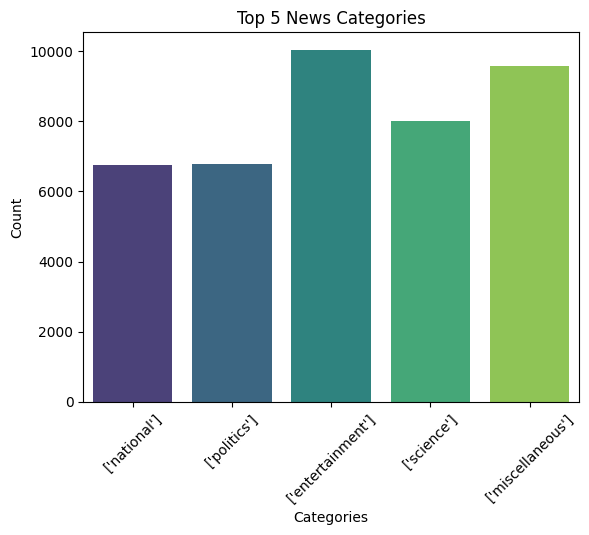

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
top_n = 5
top_categories = df['News Categories'].value_counts().nlargest(top_n).index

df_top = df[df['News Categories'].isin(top_categories)]

sns.countplot(x='News Categories', data=df_top, palette='viridis')
plt.title(f'Top {top_n} News Categories')
plt.xlabel('Categories')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show();

#### Text preperation - Preprocessing steps

In [102]:
import string
import re
import regex
from nltk.corpus import stopwords
import nltk
from abbreviations import abbreviation_dict

In [104]:
#created a function to remove all punctuation characters
def remove_punc(text):
    punc=string.punctuation #contains all punctuation characters
    return ''.join([char for char in text if char not in punc])

df["News Categories"]=df["News Categories"].apply(remove_punc)

#1- lower case
df["Content"]=df["Content"].str.lower()

#2- Remove html tags
def has_html_tags(text):
    pattern = re.compile('<.*?>') # Regular expression to match HTML tags
    matches = pattern.findall(text) # Search for he pattern in the text
    return bool(matches) # Return True if any HTML tags are found, False otherwise
df['has_html_tags'] = df['Content'].apply(has_html_tags)

#3- Remove emojies
def has_emoji(text):
    emoji_pattern = regex.compile(r'\p{Emoji}', flags=regex.UNICODE)
    return bool(emoji_pattern.search(text))
has_emojis =  df['Content'].apply(has_emoji)

#4- Remove urls
import re
def remove_url(text):
    pattern=re.compile(r'https?://\S+|www\.S+')
    return pattern.sub(r'',text)
df["Content"]=df["Content"].apply(remove_url)

#5- Remove all punctuation characters
df["Content"]=df["Content"].apply(remove_punc)

#6- Remove stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)
df["Content"]=df["Content"].apply(lambda x: remove_stopwords(x))

#7- Remove abbreviations
def replace_abbreviations(text, abbreviation_dict):
    for abbreviation, full_form in abbreviation_dict.items():
        text = text.replace(abbreviation, full_form)
    return text
df['Content'] = df['Content'].apply(lambda x: replace_abbreviations(x,abbreviation_dict))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alice\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [106]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alice\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [107]:
# Tokeinization
def tokenize_text(text): #cleaning, standardizing spacing - consistent space characters between words and sentences.
    # Tokenize each sentence into words
    words_list = [word_tokenize(sentence) for sentence in sent_tokenize(text)] #tokenize
    words = ' '.join(' '.join(words) for words in words_list) #detokenize 
    return words

df["Content"] = df["Content"].apply(tokenize_text)
df.head()

,Headline,Content,News Categories,Date,category_grouped,has_html_tags
0,Congress leader Baljinder Singh shot dead at h...,congress leader baljinder singh shot dead hous...,national,19-09-2023,['national'],False
1,17-year-old girl preparing for NEET dies by su...,another neet aspirant died suicide rajasthans ...,national,19-09-2023,['national'],False
2,Hampers to welcome MPs in new Parliament tomor...,order mark firstever working day new parliamen...,national,19-09-2023,['national'],False
3,"Only 10% women lawmakers in RS, while only 14%...",congress president mallikarjun kharge speaking...,national,19-09-2023,['national'],False
4,"Ganesh temple decorated with notes, coins wort...",sri sathya ganapathi temple bengaluru adorned ...,national,19-09-2023,['national'],False


In [110]:
#Split data
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

### Label Encoding

In [112]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

X = df['Content']
y = df['category_grouped']

# Encoding labels
lb_encoder = LabelEncoder()
y_encoded = lb_encoder.fit_transform(y)
#address class imbalance by assigning different weights to classes
class_weights_train = compute_class_weight('balanced', classes=np.unique(y_encoded), y=y_encoded)

In [115]:
class_weights_train[1:5]

array([11.38281358,  7.42357408,  2.56755194,  5.59810504])

In [116]:
X.head()

0    congress leader baljinder singh shot dead hous...
1    another neet aspirant died suicide rajasthans ...
2    order mark firstever working day new parliamen...
3    congress president mallikarjun kharge speaking...
4    sri sathya ganapathi temple bengaluru adorned ...
Name: Content, dtype: object

### Split training and testing dataset

In [117]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

### Modeling - Multinomial Naive Bayes with BOW

In [119]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score,classification_report

model = make_pipeline(CountVectorizer(), MultinomialNB()) #CountVectorizer for Bag of Words
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"MultinomialNB with Bag of Words accuracy: {accuracy:.3f}")
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

MultinomialNB with Bag of Words accuracy: 0.874
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00         6
           2       1.00      1.00      1.00         8
           3       1.00      0.78      0.88        32
           4       1.00      1.00      1.00        17
           5       0.00      0.00      0.00         4
           7       1.00      0.62      0.77         8
           8       1.00      1.00      1.00         7
           9       1.00      0.75      0.86         4
          10       0.00      0.00      0.00         2
          12       1.00      1.00      1.00        15
          13       0.00      0.00      0.00         6
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         5
         

C:\Users\alice\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alice\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alice\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

### Cross-validation

In [120]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv_scores = cross_val_score(model, X, y_encoded, cv=StratifiedKFold(n_splits=3, shuffle=True), scoring='accuracy')

print(f"Cross-Validation Scores:{cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")

C:\Users\alice\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Cross-Validation Scores:[0.86287259 0.86126281 0.86396595]
Mean Accuracy: 0.86


### Fine-tuning

In [121]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_dist = {
    'countvectorizer__max_features': [5000, 10000, None],
    'countvectorizer__ngram_range': [(1, 1), (1, 2)],
    'multinomialnb__alpha': uniform(0.1, 2.0)  # Example range for alpha
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=5, scoring='accuracy', cv=cv, verbose=1, n_jobs=1)
random_search.fit(X, y_encoded)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\alice\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('countvectorizer',
                                              CountVectorizer()),
                                             ('multinomialnb',
                                              MultinomialNB())]),
                   n_iter=5, n_jobs=1,
                   param_distributions={'countvectorizer__max_features': [5000,
                                                                          10000,
                                                                          None],
                                        'countvectorizer__ngram_range': [(1, 1),
                                                                         (1,
                                                                          2)],
                                        'multinomialnb__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000020EF00CEF60>},
                   scoring='accuracy', verbose=1)

In [54]:
best_params = random_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'countvectorizer__max_features': 10000, 'countvectorizer__ngram_range': (1, 2), 'multinomialnb__alpha': 0.13200731150436554}


In [55]:
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {accuracy:.3f}")

Best Model Accuracy: 0.893


In [57]:
#Error Analysis
# Inverse transform the predicted labels to get the original class labels
predicted_labels_original = lb_encoder.inverse_transform(y_pred_best)

In [58]:
correct_predictions = sum(y_test == y_pred_best)
wrong_predictions = len(y_test) - correct_predictions
print(f'Correct Predictions: {correct_predictions}, Wrong Predictions: {wrong_predictions}')

Correct Predictions: 35683, Wrong Predictions: 4259


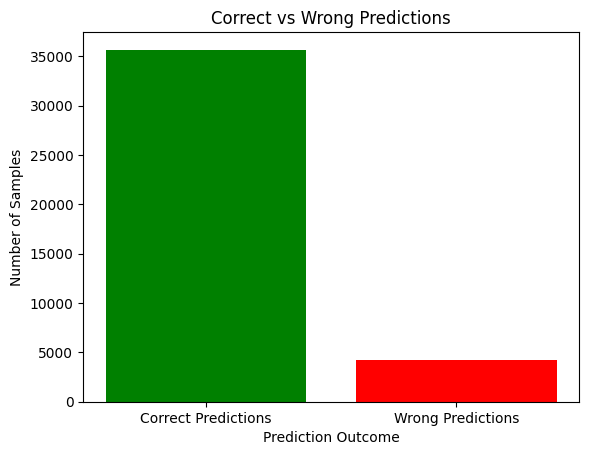

In [59]:
labels = ['Correct Predictions', 'Wrong Predictions']
values = [correct_predictions, wrong_predictions]

plt.bar(labels, values, color=['green', 'red'])
plt.title('Correct vs Wrong Predictions')
plt.xlabel('Prediction Outcome')
plt.ylabel('Number of Samples')
plt.show()

In [60]:
#final dataframe with text and predicted labels
final_df = pd.DataFrame({'Content': X_test, 'Predicted_Labels': predicted_labels_original, 'Actual_Labels': lb_encoder.inverse_transform(y_test)})

final_df.head()

,Content,Predicted_Labels,Actual_Labels
23219,congress sandeep dikshit monday asked aimim ch...,['politics'],['politics']
48597,square ceo alyssa henry stepping nine years pa...,"['business', 'startup']","['business', 'startup']"
162019,every womans menstruation cycle reflects certa...,['Health___Fitness'],['Health___Fitness']
35753,jonty rhodes superman runout inzamamulhaq worl...,"['sports', 'ODI_World_Cup_2023']","['sports', 'ODI_World_Cup_2023']"
108844,cartrade technologies reported yoy surge profi...,"['business', 'startup', 'technology']","['business', 'startup', 'technology']"
